In [50]:
# standard python modules
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from math import sqrt
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
import statsmodels.api as sm


# my modules
import src.wrangle as wr
import src.evaluate as ev 
import src.put_it_together as pit

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [235]:
reload(pit)

<module 'src.put_it_together' from '/Users/CryanRedrose/codeup-data-science/CodeUp/regression_zillow_2017/src/put_it_together.py'>

In [208]:
simple_df = wr.zillow_2017()
complex_df = wr.zillow_2017(simple=False)

## First thing, first. Cleaning our data. 
- We removed outliers that ended up contributing to about 11% of the sample. Usually, we don't think of 11% of a population as being outliers. In this case however, we want to predict house prices that actual customers for houses will be looking to purchase.
- As such, we eliminated houses with certain features including:
1. More than 5 bedrooms or 1 bedroom
2. 5 or more bathrooms
3. more than 6,000 square feet
4. lot sizes which are smaller than 750 square feet
5. houses which are older than a century 

- While a few of our important variables do not look "pretty", I think they are much more workable than what we began with.

## Furthermore, from the beginning I wanted to carry a comparison between two different sets of features for our modeling. 
- I wanted to see just how profoundly some of these features play off each other and influence our ability to predict home values.
- Those feature sets will be identified as the complex model and the simple model, the difference being that the complex model has more variables.

1. The simple model contains four features: bedrooms, baths, sqaure feet of the house, and fips (county information)

2. The complex model contains the following features: bedrooms, bathrooms - but including half bathrooms, lot size, square feet of the house, size of the lot, and year the home was built. 


### After all our cleaning was completed, we were left with 48,223 properties - which I may refer to as observations interchangably

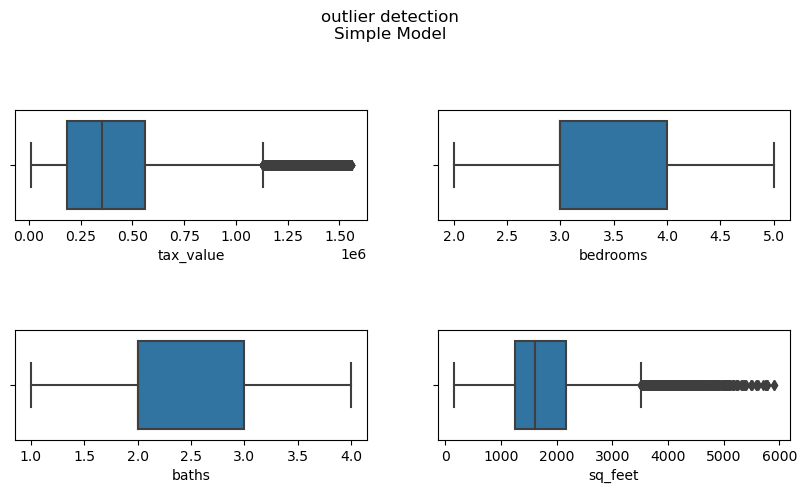

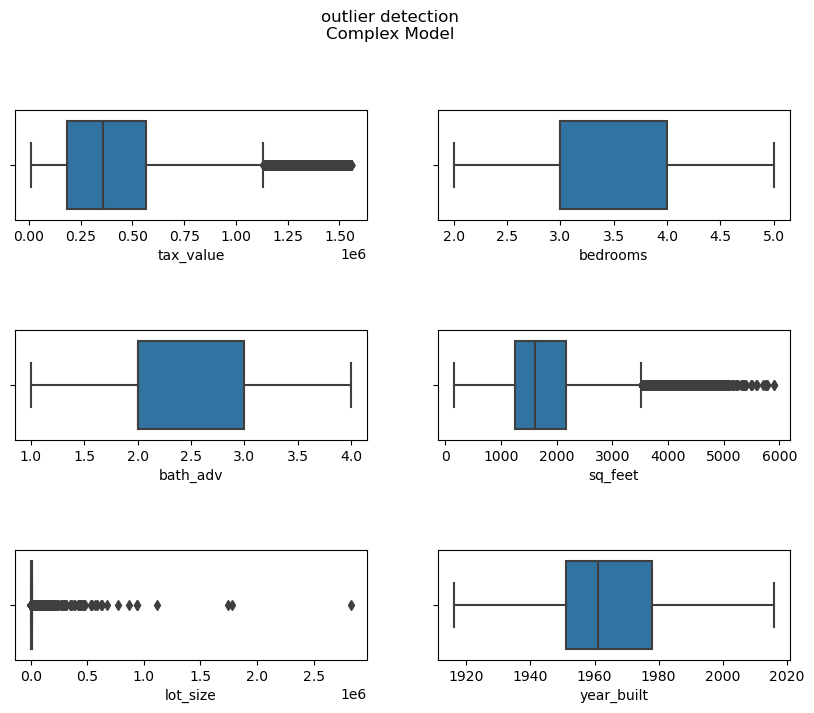

In [215]:
pit.explore_simple(simple_df)
pit.explore_complex(complex_df)

### I had a suspicion that we could not effectively handle the data sets as 1 individual model because the samples would diverge around location. So, I investigated that suspicion and found that each county had unique features and distributions of property values. 

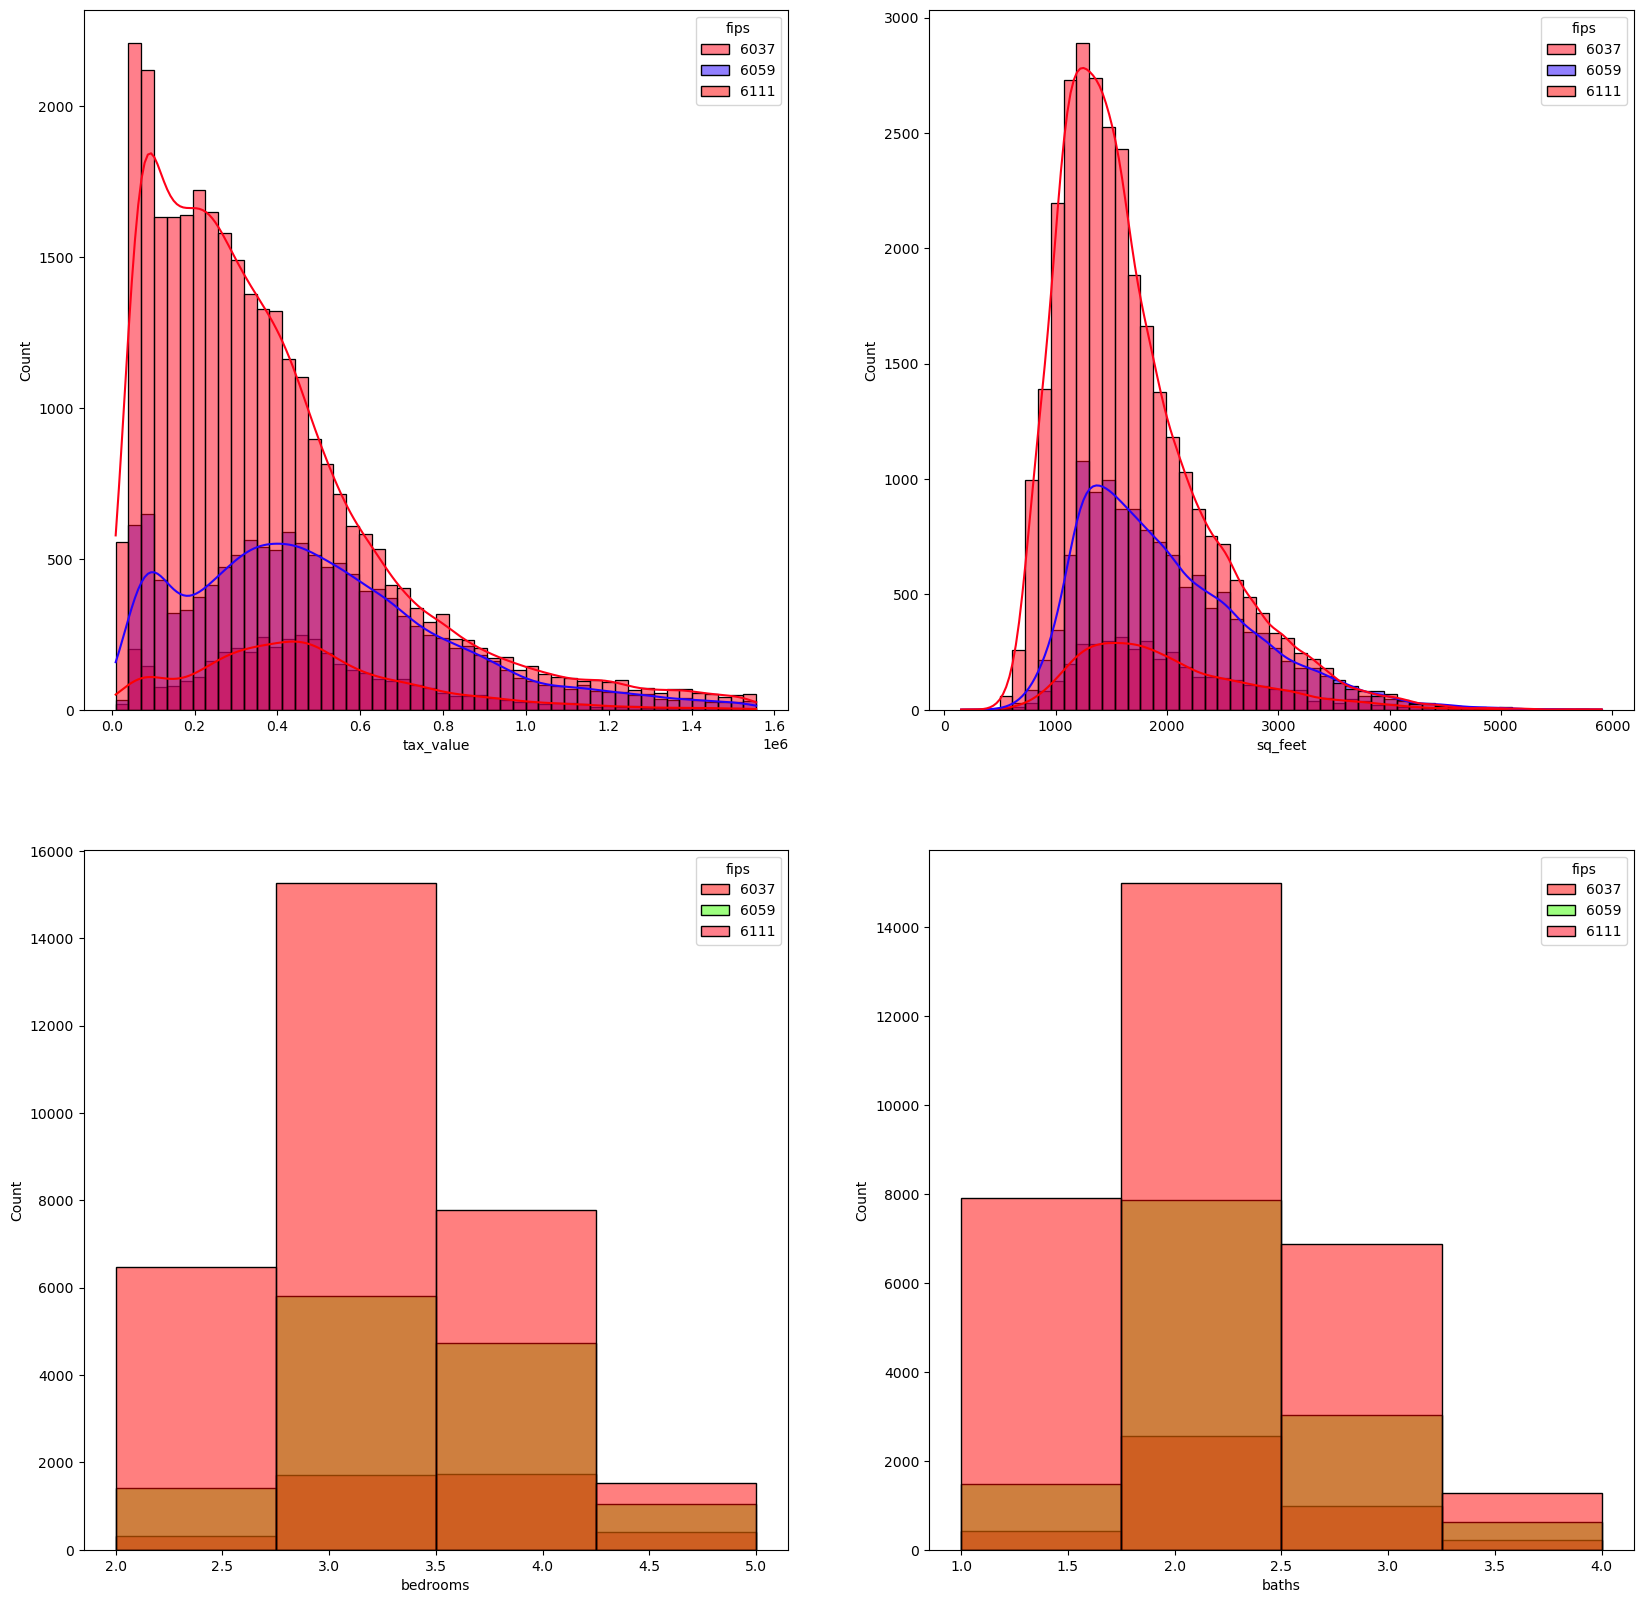

In [236]:
pit.fips_viz(simple_df)

In [173]:
# split data without differentiating counties
x_train, y_train, x_validate, y_validate, x_test, y_test = wr.x_y(df, 'tax_value')


In [174]:
target = y_train
independent = x_train

In [175]:
''' 
scoring best variables using f_regression
'''


kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(x_train, y_train)
x_train.columns[kbest.get_support()]
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(independent.columns)

#concat two dataframes for better visualization 
feature_scores1 = pd.concat([dfcolumns, dfscores], axis=1)

# renaming the two columns to make sense
feature_scores1.columns= ['variables','score']
feature_scores1.nlargest(5,'score')

,variables,score
4,year_built,2.090615e+10
3,lot_size,7.306631e+06
2,sq_feet,6.830078e+03
1,bath_adv,6.587760e+03
5,fips,5.707548e+03


In [222]:
simple_df.head()

,tax_value,bedrooms,baths,sq_feet,fips
0,1023282,4,3,3100,6059
1,464000,2,1,1465,6111
2,564778,3,2,1243,6059
3,145143,4,3,2376,6037
4,773303,4,3,2962,6037


In [226]:
def correlate_viz(df, df2, target):

    # sets size of the vizualization product
    plt.figure(figsize=(10,10))

    # DataFrame 1 - both features
    # creates a vertical heat map, correlating values in dataframe with a feature in the dataframe 
    # (the target value to be predicted)
    plt.subplot(1,2,1)
    heatmap = sns.heatmap(df.corr()[[target]].sort_values(by=target, ascending = False), vmin=-1, vmax=1, annot=True,cmap='BrBG')

    # title information
    heatmap.set_title('Simple Model \nFeatures Correlating with \nTax Value', fontdict={'fontsize':18}, pad=16);
    
    # DataFrame 2 - 
    plt.subplot(1,2,2)
    heatmap = sns.heatmap(df2.corr()[[target]].sort_values(by=target, ascending = False), vmin=-1, vmax=1, annot=True,cmap='BrBG')

    # title information
    heatmap.set_title('Complex Model \nFeatures Correlating with \nTax Value', fontdict={'fontsize':18}, pad=16);


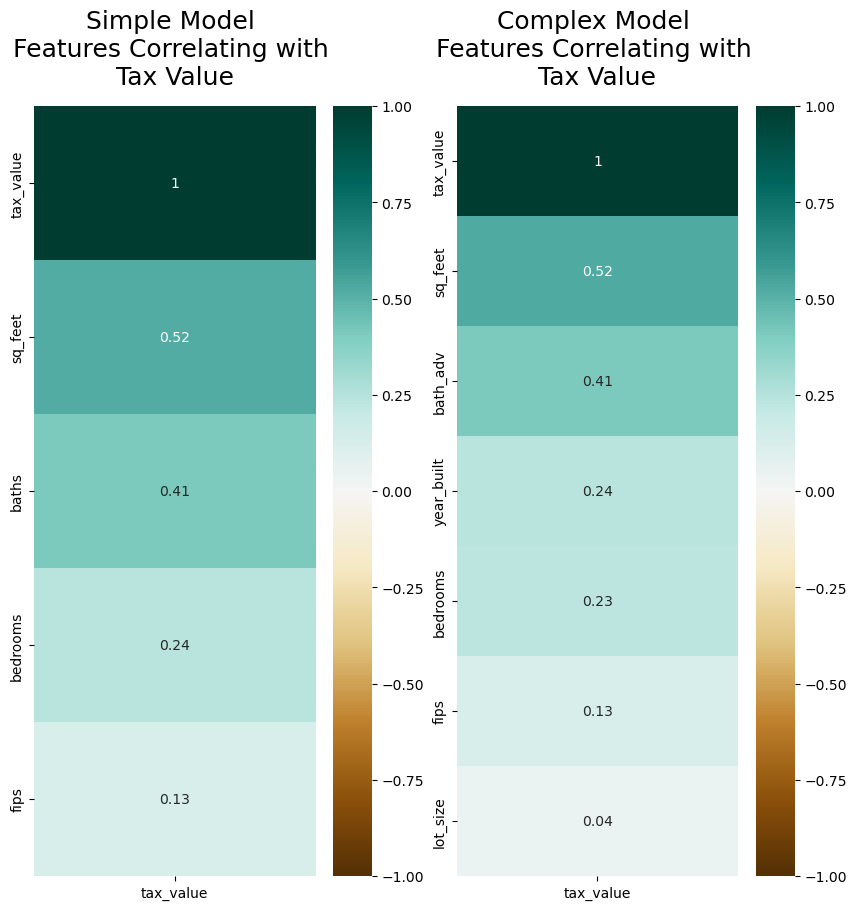

In [227]:
correlate_viz(simple_df, complex_df, 'tax_value')

In [44]:
import keyword

In [180]:
def do_regression():

    # creating dataframe to hold values for comparison between prediction models
    predictions = pd.DataFrame()

    # creating simple regression model BEFORE splitting by county

    # make the model
    lm = LinearRegression()

    # fit data to simple regression
    lm.fit(x, y)

    # make predictions
    predictions['simple_model'] = lm.predict(x)
    
    return predictions

In [178]:
def measure_performance(df):
    df = pd.DataFrame()
    for i in df.columns:
        df = df.append(evaluate.regression_errors(df['target'], df[i], df=True, features=4), ignore_index=True)
        #test_test['Model'] = predictions.columns[i]
        #test_test.set_index(predictions.columns[i], inplace=True)


    df['Model'] = np.array(df.columns)
    df.set_index('Model', inplace=True)
    return df

In [ ]:
prediction_df = do_regression()